<a href="https://colab.research.google.com/github/Conversalfall/AI/blob/main/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.datasets import load_diabetes, load_digits

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import numpy as np

import pandas as pd


## `Data()`

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

NameError: ignored

NameError: ignored

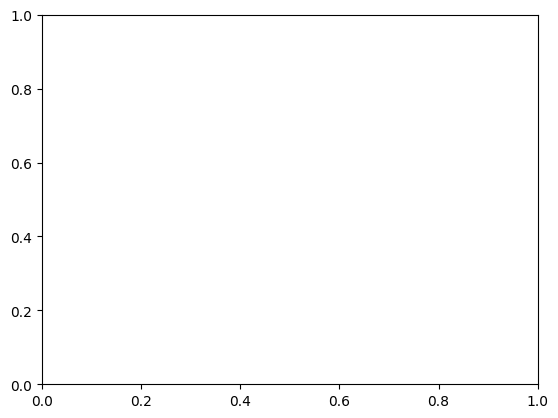

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.isnull().sum()

# Remove rows with any null values
# df.dropna(inplace=True)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
# Separate input (X) and output (Y) data
Y = df["target"]  # Output data
X = df.drop(["target"], axis=1)  # Input data

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
# Initialize Min-Max Scaler
scaler_1 = StandardScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

## `MLPClassifier()`

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,), activation='linier', solver='adam',
                      alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=12)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10, 5, 2), random_state=12, verbose = True)
model.fit(x_train, y_train)
model.score(x_test, y_test)

Iteration 1, loss = 1.55711363
Iteration 2, loss = 1.55202633
Iteration 3, loss = 1.54694150
Iteration 4, loss = 1.54191421
Iteration 5, loss = 1.53680224
Iteration 6, loss = 1.53163204
Iteration 7, loss = 1.52645183
Iteration 8, loss = 1.52123300
Iteration 9, loss = 1.51596325
Iteration 10, loss = 1.51077946
Iteration 11, loss = 1.50561940
Iteration 12, loss = 1.50049241
Iteration 13, loss = 1.49539555
Iteration 14, loss = 1.49038230
Iteration 15, loss = 1.48551351
Iteration 16, loss = 1.48078403
Iteration 17, loss = 1.47615333
Iteration 18, loss = 1.47157884
Iteration 19, loss = 1.46718824
Iteration 20, loss = 1.46297381
Iteration 21, loss = 1.45885418
Iteration 22, loss = 1.45475084
Iteration 23, loss = 1.45065405
Iteration 24, loss = 1.44659854
Iteration 25, loss = 1.44261584
Iteration 26, loss = 1.43870058
Iteration 27, loss = 1.43483213
Iteration 28, loss = 1.43099198
Iteration 29, loss = 1.42720221
Iteration 30, loss = 1.42343516
Iteration 31, loss = 1.41956821
Iteration 32, los

0.36666666666666664

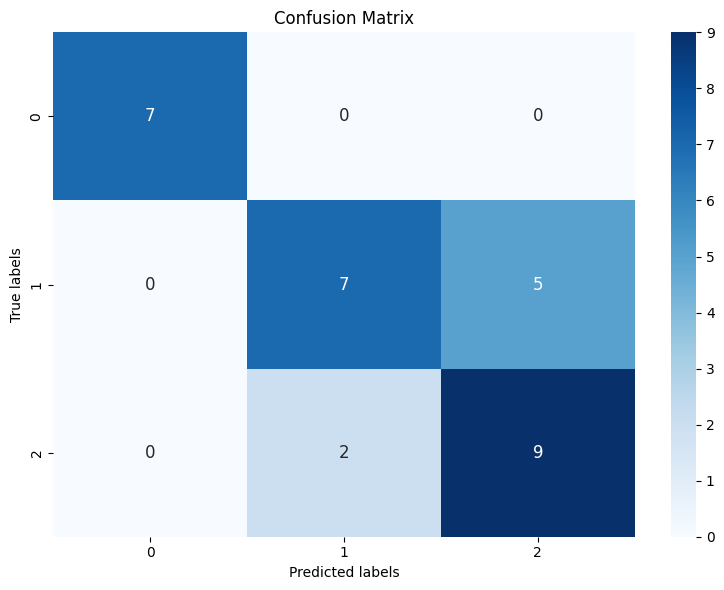

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.78      0.58      0.67        12
           2       0.64      0.82      0.72        11

    accuracy                           0.77        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.78      0.77      0.76        30



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = MLPClassifier(hidden_layer_sizes=(90), random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


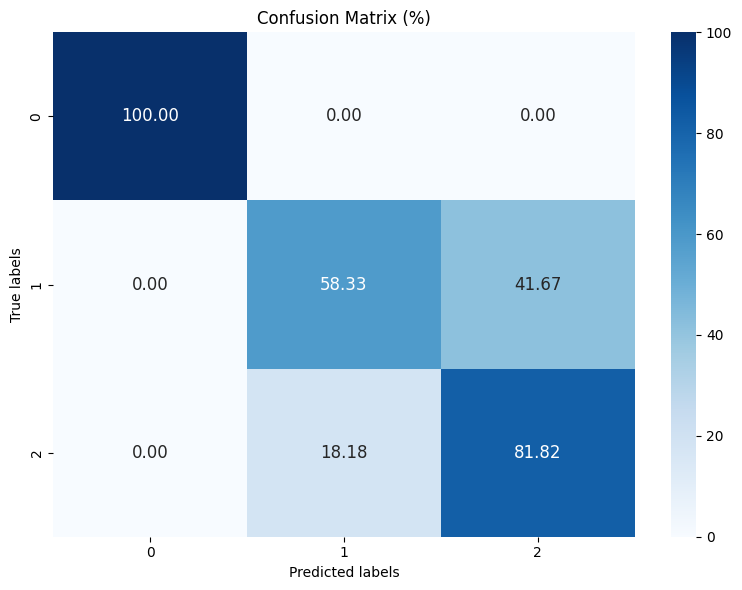

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.78      0.58      0.67        12
           2       0.64      0.82      0.72        11

    accuracy                           0.77        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.78      0.77      0.76        30



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = MLPClassifier(hidden_layer_sizes=(90), random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import validation_curve
# import matplotlib.pyplot as plt

# # Define the MLPClassifier model
# model = MLPClassifier(hidden_layer_sizes=(4), random_state=12, verbose=True)

# # Train the model and capture the training/validation scores and losses
# train_scores, valid_scores = validation_curve(
#     model, x_train, y_train, param_name="max_iter", param_range=[10, 50, 100, 200],
#     cv=5, scoring="accuracy", n_jobs=1
# )

# # Calculate the mean training/validation losses
# train_losses = 1 - train_scores.mean(axis=1)
# valid_losses = 1 - valid_scores.mean(axis=1)

# # Fit the model with the full training set
# model.fit(x_train, y_train)

# # Calculate the accuracy on the test set
# test_accuracy = model.score(x_test, y_test)

# # Plotting the training and validation losses
# plt.figure(figsize=(8, 6))
# plt.plot([10, 50, 100, 200], train_losses, label='Training loss')
# plt.plot([10, 50, 100, 200], valid_losses, label='Validation loss')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Loss')
# plt.title('Training and Validation Losses')
# plt.legend()
# plt.show()

# print(f"Test Accuracy: {test_accuracy}")


## `LogisticRegression()`

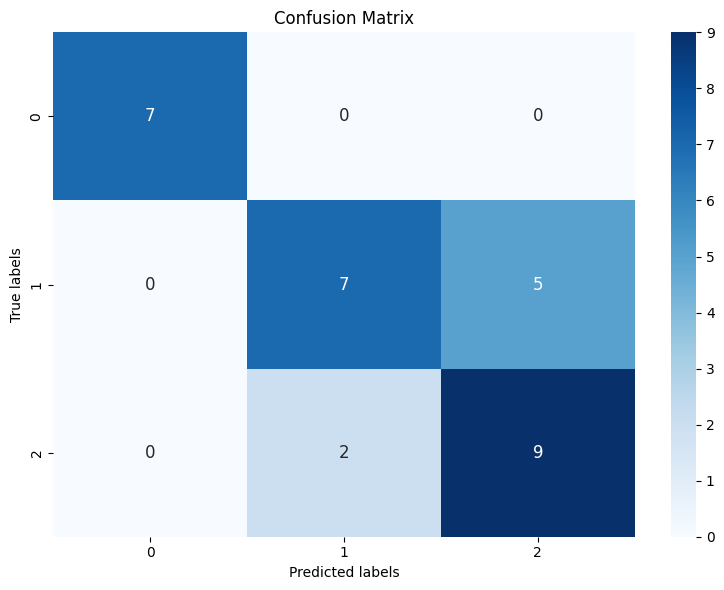

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.78      0.58      0.67        12
           2       0.64      0.82      0.72        11

    accuracy                           0.77        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.78      0.77      0.76        30



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = LogisticRegression(max_iter=1000, random_state=12)
# model = LogisticRegression(max_iter=10000, random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


## `RBF()`

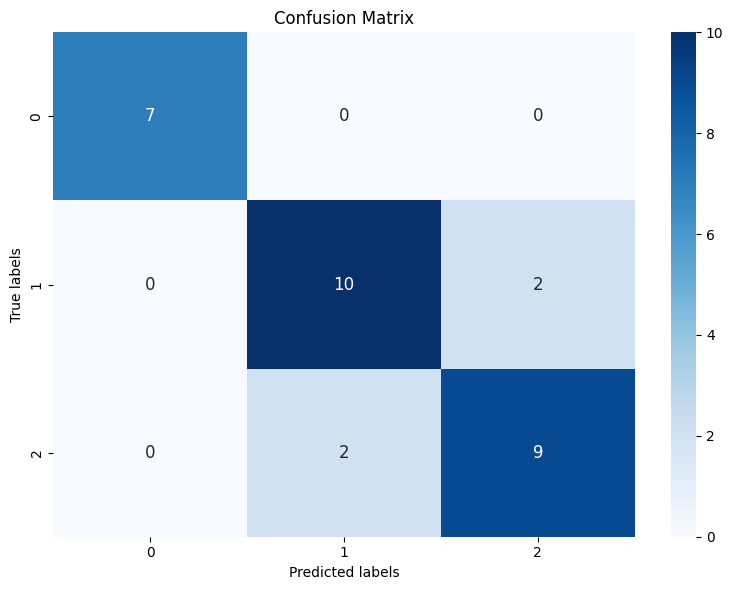

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = SVC(kernel='rbf', random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


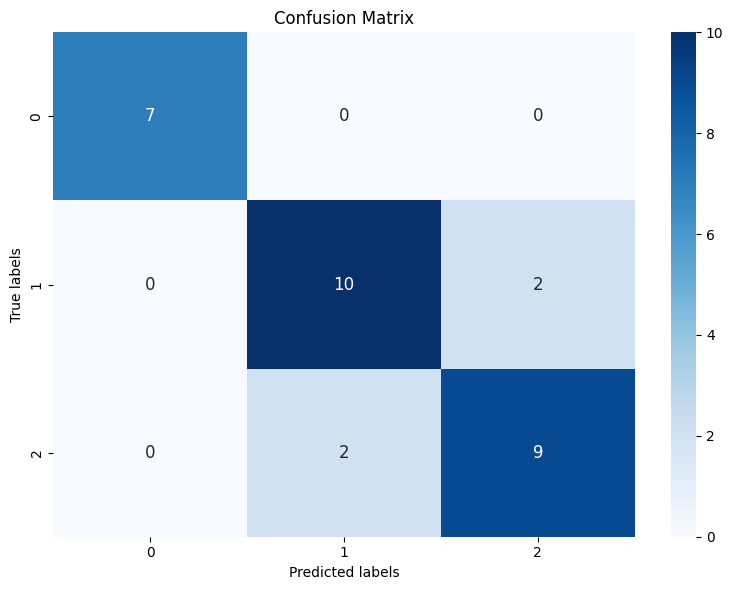

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've trained your model already
kernel = 0.1 * RBF(0.1)  # Define the RBF kernel
model = GaussianProcessClassifier(kernel=kernel, random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
